# Set the runtime to GPU : Runtime ---> Change runtime type ---> GPU

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

Load dataset:

MNIST handwritten digit dataset is a collection of digits which can be used for classification purposes.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() # load the data from keras dataset

print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

170508288/170498071 [==============================] - 4s 0us/step
x_train shape (50000, 32, 32, 3)
x_test shape (10000, 32, 32, 3)
y_train shape (50000, 1)
y_test shape (10000, 1)


In [3]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

<BarContainer object of 10 artists>

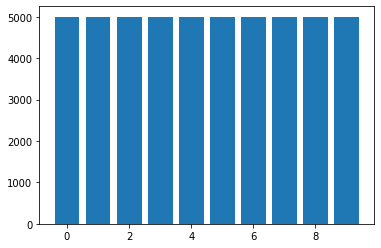

In [4]:
plt.bar(np.unique(y_train, return_counts=True)[0],np.unique(y_train, return_counts=True)[1])

Visualize images

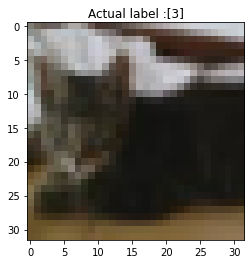

In [5]:
i=9 # index of image you want to see
plt.title('Actual label :'+ str(y_train[i]))
plt.imshow(x_train[i])

In [6]:
np.amax(x_train)

255

Scaling images for feeding into the Artificial neural networks



In [7]:
x_train = x_train/np.amax(x_train)
print(x_train.shape)
x_test = x_test/np.amax(x_train)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Model building

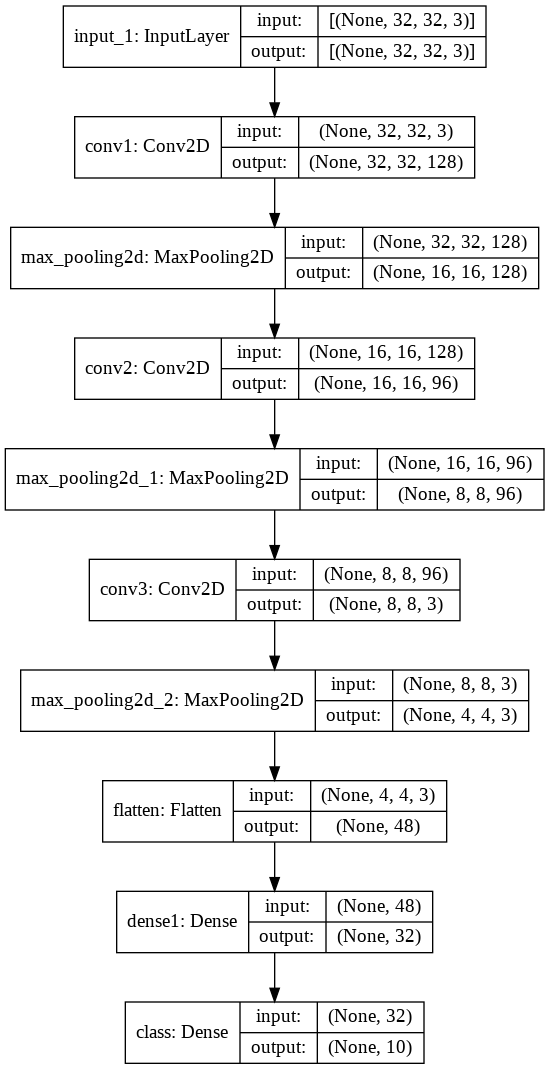

In [8]:
input = Input(shape=(32,32,3)) # the shape of every input is 28x28 = 784

layer1 = Conv2D(128,5,activation='relu', name = 'conv1', padding = 'same')(input) # filters = 128, kernel size = 5, padded convolutions
layer1mp = MaxPool2D()(layer1) # 28,28,128 -->  14,14,128
layer2 = Conv2D(96,3,activation='relu', name = 'conv2', padding = 'same')(layer1mp)
layer2mp = MaxPool2D()(layer2) # 14,14,96 -->  7,7,96
layer3 = Conv2D(3,11,activation='relu', name = 'conv3', padding = 'same')(layer2mp)
layer3mp = MaxPool2D()(layer3)  # 7,7,64 -->  3,3,64
flatten = Flatten()(layer3mp)  #3,3,64 --> 3*3*64
dense1 = Dense(32,activation='relu', name ='dense1')(flatten)
output = Dense(10,activation='softmax', name ='class')(dense1) # activation is softmax for classifiying into 10 classes 

classifier = keras.Model(input,output)
tf.keras.utils.plot_model(classifier,show_shapes=True, show_layer_names=True)

In [9]:
# compile the model

classifier.compile(optimizer = optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

# sparse_categorical_crossentropy is the loss function for sparsly coded labels. 
# eg: shape of y_train = (?,)/(?,1) i.e. single label and not an array

Train the model

In [10]:
classifier.fit(x_train,y_train,batch_size=64,epochs = 10)

Epoch 1/10
782/782 [==============================] - 38s 8ms/step - loss: 1.6495 - accuracy: 0.3979
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 1.2563 - accuracy: 0.5506
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 1.1099 - accuracy: 0.6038
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 1.0123 - accuracy: 0.6417
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.9459 - accuracy: 0.6652
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.8760 - accuracy: 0.6925
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.8293 - accuracy: 0.7090
Epoch 8/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7884 - accuracy: 0.7233
Epoch 9/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7519 - accuracy: 0.7356
Epoch 10/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7232 - accuracy: 0.746

In [11]:
predictions = classifier.predict(x_test)
print('predictions shape: ', predictions.shape)

# Get the actual labels

y_preds = np.argmax(predictions, axis = -1)
print('Changed shape: ', y_preds.shape)

predictions shape:  (10000, 10)
Changed shape:  (10000,)


In [14]:
# Computing the accuracy

accuracy = np.sum(y_preds.reshape((-1,1)) == y_test)/len(y_preds)*100

print('The testing accuracy is ',accuracy,' %')

The testing accuracy is  52.44  %


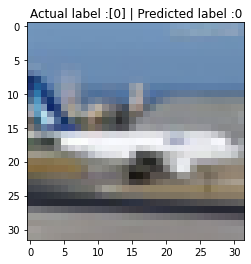

In [19]:
i=90 # index of image you want to see
plt.title('Actual label :' + str(y_test[i]) + ' | Predicted label :' + str(y_preds[i]))
plt.imshow(x_test[i].reshape((32,32,3))/255.0)